In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy



# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['faanui',
 'kathmandu',
 'mataura',
 'sao felix do xingu',
 'katsuura',
 'busselton',
 'yulara',
 'iwanai',
 'rikitea',
 'barrow',
 'newport',
 'clearwater',
 'barentsburg',
 'whyalla',
 'upernavik',
 'nelson bay',
 'ust-kuyga',
 'attawapiskat',
 'qaanaaq',
 'talnakh',
 'surt',
 'bubaque',
 'teruel',
 'ludvika',
 'dingle',
 'marcona',
 'samusu',
 'bereda',
 'port alfred',
 'uga',
 'tuktoyaktuk',
 'bluff',
 'vila',
 'hit',
 'vaini',
 'kodiak',
 'oyem',
 'aswan',
 'samalaeulu',
 'atuona',
 'formoso do araguaia',
 'husavik',
 'albany',
 'torbay',
 'kavaratti',
 'nanortalik',
 'acapulco',
 'keti bandar',
 'dikson',
 'kloulklubed',
 'sao filipe',
 'korla',
 'cherskiy',
 'khatanga',
 'carnarvon',
 'cabo san lucas',
 'abu kamal',
 'agadez',
 'atar',
 'tromso',
 'kapaa',
 'yellowknife',
 'monte cristi',
 'saint-pierre',
 'tommot',
 'fairbanks',
 'cidreira',
 'nikolskoye',
 'hobart',
 'langen',
 'pacific grove',
 'saldanha',
 'bandarbeyla',
 'wulanhaote',
 'hermanus',
 'taolanaro',
 'victor ha

In [6]:
#create the url to pull data from with the proper units
base_url =  "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

#create lists to store the various data points
city_name = []
cloudinesses = []
countries =[]
date = []
humidity = []
lats = []
lngs = []
temps = []
wind_speeds = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        countries.append(response['sys']['country'])
        date.append(response['dt'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_name.append(city)
        else:
            count_one += 1
            city_name.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("not found")
print("------------------------------\nData Retrieval Complete\n------------------------------")


Processing Record 1 of Set 1 | faanui
Processing Record 2 of Set 1 | kathmandu
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | sao felix do xingu
Processing Record 5 of Set 1 | katsuura
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | yulara
Processing Record 8 of Set 1 | iwanai
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | newport
Processing Record 12 of Set 1 | clearwater
not found
Processing Record 13 of Set 1 | whyalla
Processing Record 14 of Set 1 | upernavik
Processing Record 15 of Set 1 | nelson bay
Processing Record 16 of Set 1 | ust-kuyga
not found
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | talnakh
Processing Record 19 of Set 1 | surt
Processing Record 20 of Set 1 | bubaque
Processing Record 21 of Set 1 | teruel
Processing Record 22 of Set 1 | ludvika
Processing Record 23 of Set 1 | dingle
not found
not found
Processing Record 24 of Set 1 | 

Processing Record 49 of Set 4 | airai
Processing Record 1 of Set 5 | muscat
Processing Record 2 of Set 5 | kayerkan
not found
Processing Record 3 of Set 5 | egvekinot
Processing Record 4 of Set 5 | ballina
Processing Record 5 of Set 5 | necochea
Processing Record 6 of Set 5 | ngunguru
not found
Processing Record 7 of Set 5 | karratha
Processing Record 8 of Set 5 | beira
Processing Record 9 of Set 5 | pijijiapan
Processing Record 10 of Set 5 | mehamn
Processing Record 11 of Set 5 | kaitangata
Processing Record 12 of Set 5 | nannilam
Processing Record 13 of Set 5 | ponta do sol
not found
Processing Record 14 of Set 5 | inuvik
Processing Record 15 of Set 5 | chapayevka
Processing Record 16 of Set 5 | misratah
Processing Record 17 of Set 5 | scarborough
Processing Record 18 of Set 5 | marsh harbour
Processing Record 19 of Set 5 | namibe
not found
not found
Processing Record 20 of Set 5 | coahuayana
Processing Record 21 of Set 5 | havelock
Processing Record 22 of Set 5 | launceston
Processi

Processing Record 46 of Set 8 | kahuta
Processing Record 47 of Set 8 | tezu
not found
Processing Record 48 of Set 8 | ende
not found
Processing Record 49 of Set 8 | elliot
Processing Record 1 of Set 9 | bangkalan
Processing Record 2 of Set 9 | shubarshi
Processing Record 3 of Set 9 | paris
Processing Record 4 of Set 9 | ostrovnoy
not found
Processing Record 5 of Set 9 | bonthe
Processing Record 6 of Set 9 | camacha
Processing Record 7 of Set 9 | jinchang
Processing Record 8 of Set 9 | wangqing
Processing Record 9 of Set 9 | santa fe
Processing Record 10 of Set 9 | awjilah
Processing Record 11 of Set 9 | ust-nera
not found
Processing Record 12 of Set 9 | kolokani
Processing Record 13 of Set 9 | kabare
Processing Record 14 of Set 9 | americus
Processing Record 15 of Set 9 | barra patuca
Processing Record 16 of Set 9 | nizhniy tsasuchey
Processing Record 17 of Set 9 | adre
Processing Record 18 of Set 9 | pandan
Processing Record 19 of Set 9 | abu dhabi
not found
Processing Record 20 of Se

In [19]:
#construct a data frame to store all the values
weather_dict = {
    "City":city_name,
    "Cloudiness":cloudinesses,
    "Country": countries,
    "Date": date,
    "Humidity":humidity,
    "Lat":lats,
    "Lng":lngs,
    "Temperature":temps,
    "Wind Speed":wind_speeds
}

#create data frame and save it to a csv
weather_df = pd.DataFrame(weather_dict)
weather_df.head()
weather_df.to_csv("output/weather_df.csv")


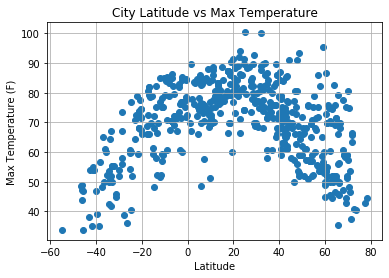

In [8]:
#begin to create the graphs 
plt.scatter(weather_df["Lat"], weather_df["Temperature"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudevsMaxTemperature.png")

# Show plot
plt.show()

Here the code is scanning the previouly created dataframe and pulling the latitude and temperature columns and plotting them aganist each other. As we can see from the graph, as latitude increase so does the temperature, a notion that follows previously held beliefs. 

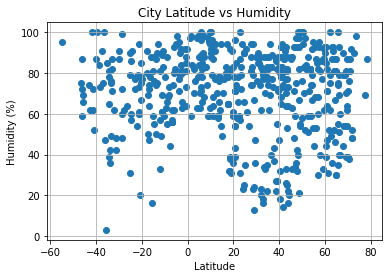

In [9]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudevsHumidity.png")

# Show plot
plt.show()

Here the code is scanning the previouly created dataframe and pulling the latitude and humidity columns and plotting them aganist each other. As we can see from the graph, as latitude does not have a huge effect on whether the percentage of a cities humidity. 

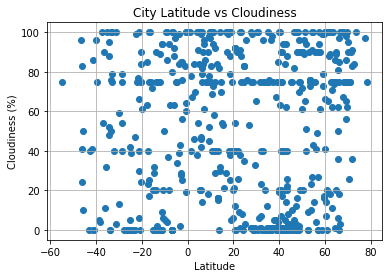

In [10]:
#plot the data
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudevsHumidity.png")

# Show plot
plt.show()

Here the code is scanning the previouly created dataframe and pulling the latitude and cloudiness columns and plotting them aganist each other. As we can see from the graph, latitude is not a reliable predictor of cloudiness as we can see that cloudiness is not effected by latitude. 

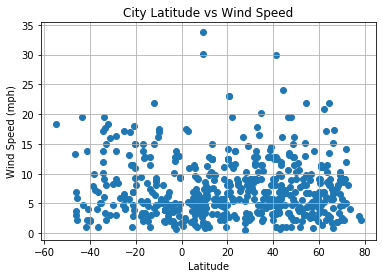

In [11]:
#plot the data 
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudevsHumidity.png")

# Show plot
plt.show()

Here the code is scanning the previouly created dataframe and pulling the latitude and wind speed columns and plotting them aganist each other. As we can see from the graph, it is fairly obivious that thr wind speed does not go higher than 30 mph in most cities. once again we can see that latitude is not a good indicator of wind speed prediction. 

In [12]:
#northern hemisphere latitude 
weather_df.head()
northern_hemi = weather_df.loc[weather_df['Lat'] >= 0]
northern_hemi

#find the latitude for the southern hemisphere
southern_hemi = weather_df.loc[weather_df['Lat'] <= 0]
southern_hemi

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Temperature,Wind Speed
0,faanui,100,PF,1594613130,78,-16.48,-151.75,78.51,12.62
2,mataura,83,NZ,1594613131,87,-46.19,168.86,43.75,3.13
5,busselton,76,AU,1594613131,49,-33.65,115.33,66.99,17.72
6,yulara,0,AU,1594613132,31,-25.24,130.99,60.80,17.22
8,rikitea,47,PF,1594613057,77,-23.12,-134.97,70.99,13.18
...,...,...,...,...,...,...,...,...,...
534,quelimane,85,MZ,1594613277,80,-17.88,36.89,66.04,5.35
535,coquimbo,59,CL,1594613106,87,-29.95,-71.34,51.80,4.70
536,auki,37,SB,1594613277,68,-8.77,160.70,84.94,5.28
538,mitsamiouli,0,KM,1594613278,69,-11.38,43.28,78.12,8.14


The r-squared is: 0.37019629337802334


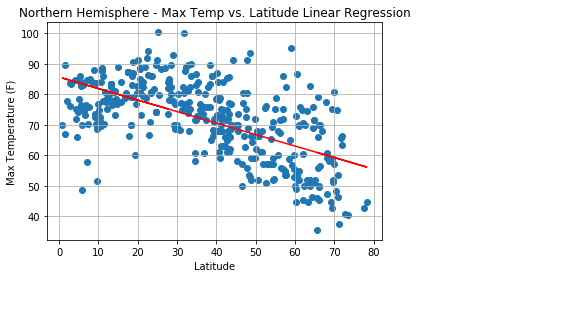

The r-squared is: 0.564153008332773


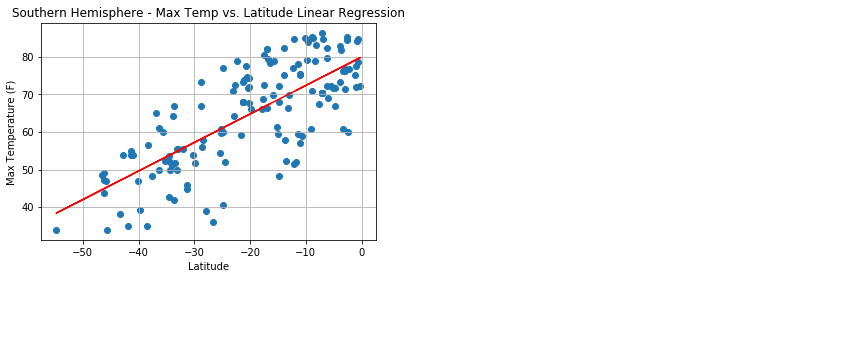

In [13]:
#nothern Hemisphere latitude vs temp linear regression
x_value = northern_hemi['Lat']
y_value = northern_hemi['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=50,color="red")

# format the graph
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
# Show plot
plt.show()

#southern hemisphere latitude vs temp linear regression 
x_value_southern = southern_hemi['Lat']
y_value_southern = southern_hemi['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value_southern,y_value_southern)
regress_values = x_value_southern * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value_southern,y_value_southern)
plt.plot(x_value_southern,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=50,color="red")

# format the graph
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

# Show plot
plt.show()



Here the code is breaking down the dataframe into two different sections based on northern and southern hemisphere by latitude values greater and lesser than 0. Northen hemisphere temperatutes decrease as the latitute heads north and this is what we expect. this is futher backed up by the r value of .56.

In [14]:
# Northern Hemisphere and Southern Hemisphere Humidity 

northern_hemi_humidity = weather_df.loc[weather_df['Lat'] >= 0]


southern_hemi_humidity = weather_df.loc[weather_df['Lat'] <= 0]



The r-squared is: 0.013830204995597502


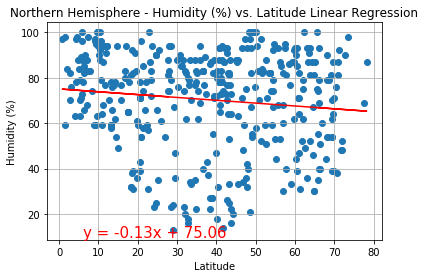

The r-squared is: 0.004741580197219398


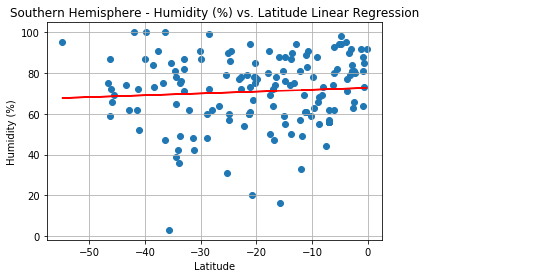

In [15]:
#nothern Hemisphere latitude vs humidity linear regression
x_value_humidity = northern_hemi['Lat']
y_value_humidity = northern_hemi['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value_humidity,y_value_humidity)
regress_values = x_value_humidity * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value_humidity,y_value_humidity)
plt.plot(x_value_humidity,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# format the graph
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
# Show plot
plt.show()

#southern hemisphere latitude vs humidity linear regression 
x_value_southern_humidity = southern_hemi_humidity['Lat']
y_value_southern_humidity = southern_hemi_humidity['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value_southern_humidity,y_value_southern_humidity)
regress_values = x_value_southern_humidity * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value_southern_humidity,y_value_southern_humidity)
plt.plot(x_value_southern_humidity,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# format the graph
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

# Show plot
plt.show()


Here the code is breaking down the dataframe into two different sections based on northern and southern hemisphere by latitude values greater and lesser than 0. From the graphs, we can conclude that the percentage of humidity a city experiences does not reflect its latitude. The r value for both is extremely low, thus signifying a low correlation. 

The r-squared is: 0.00012190015897693112


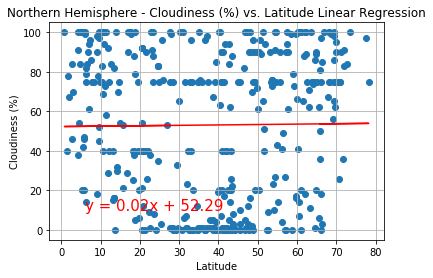

The r-squared is: 0.0017499838201778227


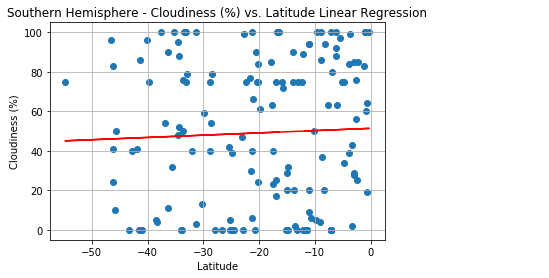

In [17]:
weather_df.head()
northern_hemi_clouds = weather_df.loc[weather_df['Lat'] >= 0]
northern_hemi

southern_hemi_clouds = weather_df.loc[weather_df['Lat'] <= 0]
southern_hemi

#nothern Hemisphere latitude vs cloudiness linear regression
x_value_clouds = northern_hemi_clouds['Lat']
y_value_clouds = northern_hemi_clouds['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value_clouds,y_value_clouds)
regress_values = x_value_clouds * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value_clouds,y_value_clouds)
plt.plot(x_value_clouds,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# format the graph
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
# Show plot
plt.show()

#southern hemisphere latitude vs temp linear regression 
x_value_southern_clouds = southern_hemi_clouds['Lat']
y_value_southern_clouds = southern_hemi_clouds['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value_southern_clouds,y_value_southern_clouds)
regress_values = x_value_southern_clouds * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value_southern_clouds,y_value_southern_clouds)
plt.plot(x_value_southern_clouds,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# format the graph
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

# Show plot
plt.show()


Here the code is breaking down the dataframe into two different sections based on northern and southern hemisphere by latitude values greater and lesser than 0. From the graphs, we can conclude that the percentage of cloudiness a city experiences does not reflect its latitude. The r value for both is extremely low, thus signifying a low correlation. 

The r-squared is: 0.00036874533383236574


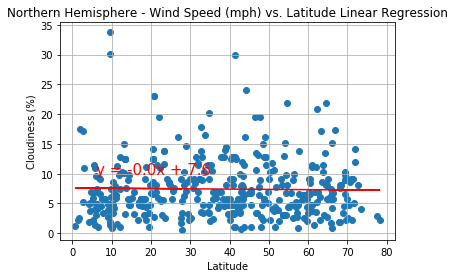

The r-squared is: 0.030593103047322028


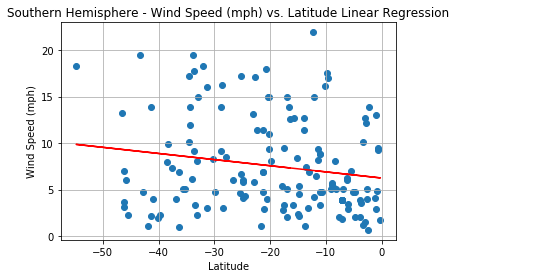

In [18]:
weather_df.head()
northern_hemi_wind = weather_df.loc[weather_df['Lat'] >= 0]
northern_hemi

southern_hemi_wind = weather_df.loc[weather_df['Lat'] <= 0]
southern_hemi

#nothern Hemisphere latitude vs cloudiness linear regression
x_value_wind = northern_hemi_wind['Lat']
y_value_wind = northern_hemi_wind['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value_wind,y_value_wind)
regress_values = x_value_wind * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value_wind,y_value_wind)
plt.plot(x_value_wind,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# format the graph
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
# Show plot
plt.show()

#southern hemisphere latitude vs temp linear regression 
x_value_southern_wind = southern_hemi_wind['Lat']
y_value_southern_wind = southern_hemi_wind['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value_southern_wind,y_value_southern_wind)
regress_values = x_value_southern_clouds * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value_southern_wind,y_value_southern_wind)
plt.plot(x_value_southern_wind,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# format the graph
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

# Show plot
plt.show()


Here the code is breaking down the dataframe into two different sections based on northern and southern hemisphere by latitude values greater and lesser than 0. From the graphs, we can conclude that the wind speed a city experiences does not reflect its latitude. The r value for both is extremely low, thus signifying a low correlation. 